# Determine Intersection of PostSpec Gao Vocab (SGNS) With Gao Vocab 

In [46]:
# Import packages.
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from io import BytesIO
from tensorflow.python.lib.io import file_io
import msgpack
import numpy as np
import pandas as pd

In [2]:
# Read in the results of Post-Spec AR.
post_spec_AR_vocab = pd.read_csv('wikimedia-PA-Gao-AR-PPDB-300-post-specialized.txt', sep=" ", header=None)

# Check the length of the vocab.
print('post_spec_AR_vocab size:', len(post_spec_AR_vocab))
post_spec_AR_vocab.head()

post_spec_AR_vocab size: 183870


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,biennials,-0.007001,0.034904,-0.006476,-0.022211,0.023702,0.005626,-0.062335,0.130678,0.079644,...,0.009290,-0.101324,0.002901,0.048940,-0.155127,-0.017552,-0.005853,-0.029875,-0.009073,-0.106691
1,tripolitan,-0.056535,0.000427,-0.022930,-0.024883,0.030431,-0.022631,0.040052,-0.053980,-0.042047,...,0.046784,-0.070465,-0.019298,-0.000591,-0.030715,-0.017091,-0.005564,-0.032029,-0.005450,0.031682
2,tsukino,0.006473,0.004586,-0.033621,-0.029989,0.071586,-0.014516,-0.032025,-0.009592,0.003382,...,-0.035731,-0.069168,0.051958,0.049571,-0.112113,-0.071534,-0.030837,-0.058374,0.050012,0.014310
3,nunnery,0.127087,0.017128,0.023523,-0.006482,-0.078610,0.004704,0.022335,0.054162,0.068886,...,-0.018985,-0.123621,0.053752,-0.004124,-0.126023,0.081543,0.011255,-0.046931,0.041655,-0.016432
4,schwarzburg-rudolstadt,0.074724,-0.015410,-0.000056,-0.032053,-0.008711,-0.030050,-0.035028,0.007226,0.111881,...,-0.033774,-0.038186,0.021029,0.038031,-0.067227,-0.019451,0.002031,-0.070298,0.037921,-0.001279


In [24]:
# Get list of words in postspec vocab.
post_spec_AR_vocab_list = post_spec_AR_vocab[0].values.tolist()

In [17]:
# Read in original Gao dictionary.
f = BytesIO(file_io.read_file_to_string('Gao-PA-300-id2word.bin',
                                        binary_mode=True))
id2word = msgpack.unpack(f, raw=False)
for i in range(1, 6):
    print(id2word[i])

.
the
to
and
of


In [48]:
# Get list of words in original gao vocab.
gao_vocab_list = list(id2word.values())
len(gao_vocab_list)

36993

In [41]:
# Define function to find interection of the two lists.
def intersection(lst1, lst2): 
    common = [value for value in lst1 if value in lst2]
    not_in_lst2 = [value for value in lst1 if value not in lst2]
    not_in_lst1 = [value for value in lst2 if value not in lst1]
    return (common, not_in_lst2, not_in_lst1)

In [43]:
# Get intersection of the vocabs.
intersection, not_in_gao, not_in_ar_postspec = intersection(post_spec_AR_vocab_list, gao_vocab_list)

TypeError: 'list' object is not callable

In [44]:
# Check length of intersection.
print('Number of words in PostSpec AR (SGNS) also in Gao: ', len(intersection))
print('Number of words in PostSpec AR (SGNS) not in Gao: ', len(not_in_gao))
print('Number of words in Gao not in PostSpec AR (SGNS): ', len(not_in_ar_postspec))

Number of words in PostSpec AR (SGNS) also in Gao:  33252
Number of words in PostSpec AR (SGNS) not in Gao:  150618
Number of words in Gao not in PostSpec AR (SGNS):  3741


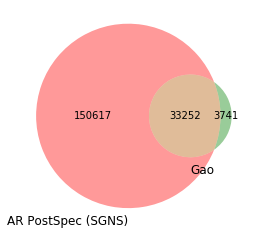

In [47]:
set1 = set(post_spec_AR_vocab_list)
set2 = set(gao_vocab_list)

venn2([set1, set2], ('AR PostSpec (SGNS)', 'Gao'))
plt.show()